In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import regex as re

In [152]:
df = pd.read_csv('cnn_samples_1-54b19b96f3c0775b116bad527df8c7b5.csv')

In [153]:
df.head()

id source  \
0  78dd3665b49b53dcfc5a568d6c662fc6ffadaedf    CNN   
1  7872802b5377b47f24d3f73c5fbb956c7f5b11ba    CNN   
2  d915e41e47a169937311e8a94e4933b5fcf879ce    CNN   
3  4d6b91f927d98511f4bc940d35b9c68ab1e34e43    CNN   
4  d49279f38b434483267fe46354d55f4d296576a5    CNN   

                                                text  \
0  (CNN) -- Most have likely heard the broad outl...   
1  (CNN) -- Nicki Minaj isn't feeling welcomed at...   
2  (CNN) -- He played the ukelele, weighed in on ...   
3  (CNN) -- CNN Hero Wilma Melville is helping re...   
4  Islamabad, Pakistan (CNN) -- Embattled Pakista...   

                                          embedding   
0  [0.998444139957428, -0.8373915553092957, 0.986...  
1  [0.7481085658073425, -0.7000635266304016, 0.99...  
2  [-0.7953892350196838, -0.9981173276901245, 0.9...  
3  [-0.13724015653133392, -0.3098432421684265, 0....  
4  [0.6646730303764343, -0.8491336703300476, -0.9...

In [141]:
def string2nparray(string_array: str) -> np.ndarray:
    string_array_list = string_array.split()
    array = np.array([float(re.sub(r'[\[\],]', '', element)) for element in string_array_list])
    return array

In [156]:
embedding_new = []
for i in df.iloc[:,3].values:
    embedding_new.append(string2nparray(i))
    
     

In [157]:
embedding_new

[array([ 0.99844414, -0.83739156,  0.98603559,  0.63745552,  0.96619922,
         0.89068544,  0.98622435,  0.90992904, -0.94820553,  0.74492866,
         0.45545182,  0.52017403, -0.99953061, -0.94481206, -0.84126365,
         0.90432775,  0.854581  ,  0.93078452, -0.95600909,  0.99611515,
         0.95639098,  0.95197284, -0.04110436,  0.98363483, -0.97688037,
        -0.88627982,  0.94491881,  0.86708969, -0.96667874, -0.9414407 ,
        -0.99830472, -0.77042073, -0.95004684, -0.98547798, -0.75785953,
        -0.28387669,  0.94829762, -0.72349101,  0.98263288, -0.93427664,
        -0.99753129, -0.98003   , -0.60568655,  0.99924868,  0.82917887,
        -0.98825479, -0.92764914,  0.99349314, -0.25481057,  0.82401872,
         0.88118374, -0.76513594,  0.2245367 , -0.66828382, -0.91240096,
        -0.94450909, -0.28336731,  0.94977421, -0.53169823, -0.99465472,
         0.89845747,  0.9309985 ,  0.84571505,  0.75857544, -0.9838863 ,
        -0.94081426, -0.99511153,  0.95716035,  0.9

In [159]:
embedding_new = np.array(embedding_new)

In [160]:
np.shape(embedding_new)

(738, 512)

In [178]:
pca = PCA(n_components=35)

In [179]:
embedding_pca = pca.fit_transform(embedding_new)

In [180]:
pca.explained_variance_ratio_

array([0.17081379, 0.10689843, 0.10047983, 0.09165484, 0.06934453,
       0.06182545, 0.04969319, 0.03549262, 0.03258629, 0.02579276,
       0.02319972, 0.01601627, 0.01376403, 0.01198719, 0.01100804,
       0.00974797, 0.00795997, 0.00745674, 0.00627895, 0.00504575,
       0.00445194, 0.00408215, 0.00359135, 0.00337873, 0.00323542,
       0.00302841, 0.00281214, 0.00261584, 0.00241688, 0.00227578,
       0.00222012, 0.00196478, 0.00193937, 0.00188937, 0.00184664])

In [181]:
embedding_pca.shape

(738, 35)

In [182]:
embedding_pca_df = pd.DataFrame(embedding_pca)

In [183]:
embedding_pca_df.head()

0         1         2         3         4         5         6   \
0  3.408177 -5.847798  7.785798  4.560189 -4.660164 -0.523460  1.737948   
1  2.583114  2.781426  2.673180  0.347691 -0.998703 -3.129745 -3.337078   
2 -2.310298 -5.186005  0.663890  2.761579  2.017767 -6.827195 -1.755262   
3 -1.725971  1.999037  2.952408 -0.596927  1.936193  1.534051 -3.696568   
4 -3.925576  2.259026 -2.398799 -2.734947 -2.780876 -2.111248  0.218634   

         7         8         9   ...        25        26        27        28  \
0 -2.629570 -1.865547 -3.911696  ... -0.049806 -1.450050  0.173895 -0.099019   
1  0.404689  0.889392  1.292474  ... -0.384084  0.588912  0.562599 -0.618118   
2  0.385893  1.626956 -4.368554  ...  0.773773  1.984748  0.400289 -0.211989   
3  0.396320  0.262359 -0.647325  ... -0.048673 -0.234183  1.069150 -0.753085   
4 -0.916759 -1.319447  0.752131  ... -1.218361  0.617665 -0.601259 -0.380039   

         29        30        31        32        33        34  
0 -0.921988 -0.449171  0.780449  0.915703 -0.403352  0.279859  
1 -0.932145  0.413390 -0.094307 -0.912658 -0.717238  0.053932  
2  0.207841 -0.290040  0.194816 -1.337292 -0.686210  0.152983  
3  0.503478 -0.666786  1.158794 -0.151280 -0.514633  0.585215  
4 -1.054023 -0.771300 -0.098660  0.315560  0.634773  0.116115  

[5 rows x 35 columns]

In [184]:
from sklearn.cluster import KMeans

In [195]:
import tqdm as tqdm

In [198]:
clusters = []
for i in range(1,51):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(embedding_pca)
    clusters.append(kmeans.inertia_)

C:\Users\moizr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [202]:
k = np.arange(1,51,1)

In [203]:
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

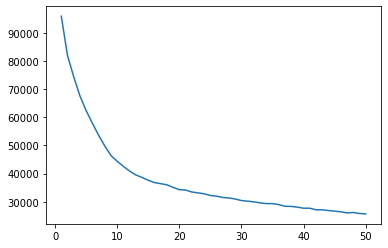

In [204]:
plt.plot(k, clusters)

In [205]:
from sklearn.cluster import DBSCAN

In [206]:
dbs = DBSCAN().fit(embedding_pca)

In [209]:
dbs.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [211]:
from sklearn.mixture import GaussianMixture

In [212]:
gmm = GaussianMixture(n_components= 3,random_state = 0)
gmm.fit(embedding_pca)
labels = gmm.predict(embedding_pca)
embedding_pca_df['labels']= labels
d0 = embedding_pca_df[embedding_pca_df['labels']== 0]
d1 = embedding_pca_df[embedding_pca_df['labels']== 1]
d2 = embedding_pca_df[embedding_pca_df['labels']== 2]

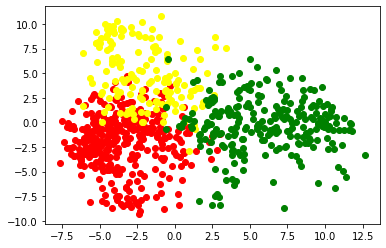

In [213]:
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')